In [39]:
import pandas as pd
from matplotlib import pyplot as plt

In [40]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [41]:
df = pd.read_excel('nasdaq100.xlsx')

In [42]:
df.head()

,Date,Starting(USD),Ending(USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [43]:
df.isnull().sum()

Date             0
Starting(USD)    0
Ending(USD)      0
dtype: int64

In [44]:
#df.drop('Date', axis=1)
df = df.drop(columns = ['Date'])

In [45]:
df.head()

,Starting(USD),Ending(USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

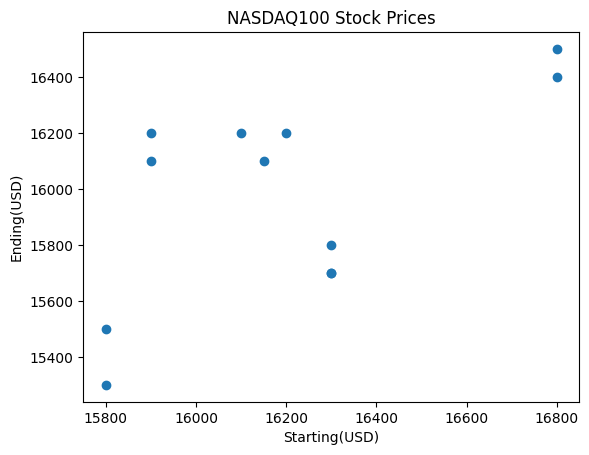

In [46]:
plt.scatter(df['Starting(USD)'], df['Ending(USD)'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('NASDAQ100 Stock Prices')

In [47]:
x = df.drop('Ending(USD)', axis=1)

In [48]:
x.head()

,Starting(USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [49]:
y = df['Ending(USD)']
y.head()

0    16500
1    16100
2    15300
3    16200
4    15700
Name: Ending(USD), dtype: int64

In [50]:
y = df[['Ending(USD)']]
y.head()

,Ending(USD)
0,16500
1,16100
2,15300
3,16200
4,15700


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression()

In [53]:
x.mean()

Starting(USD)    16195.833333
dtype: float64

In [54]:
y.mean()

Ending(USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

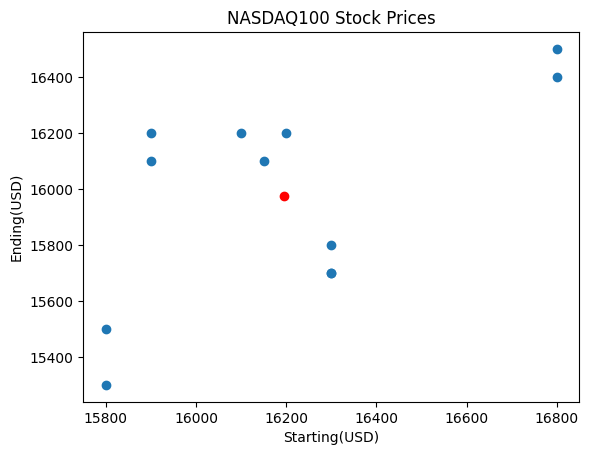

In [55]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting(USD)'], df['Ending(USD)'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('NASDAQ100 Stock Prices')

In [56]:
reg.fit(x,y) #train the ml model

LinearRegression()

In [57]:
m = reg.coef_
m

array([[0.65258293]])

In [58]:
c = reg.intercept_
c

array([5405.87555702])

In [59]:
m*16700 + c

array([[16304.0105628]])

In [60]:
reg.predict([[16700]])

array([[16304.0105628]])

In [61]:
df['Predicted_y'] = reg.predict(x)
df.head()

,Starting(USD),Ending(USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

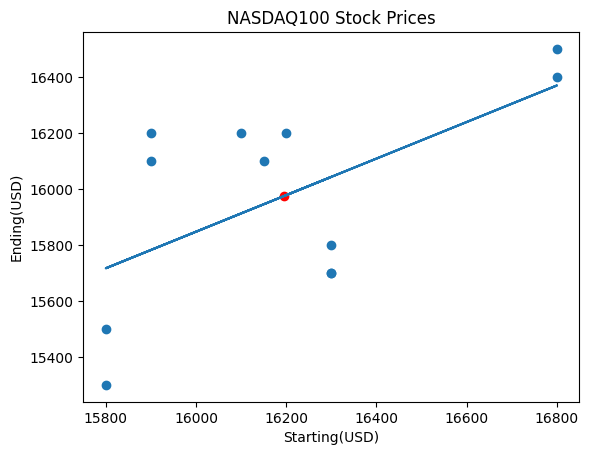

In [62]:
# plt.plot(x, Predicted_y)
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting(USD)'], df['Ending(USD)'])
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('NASDAQ100 Stock Prices')

In [63]:
reg.predict([[16600]])

array([[16238.75226935]])

# Loss and Cost Function

In [64]:
df['loss'] = df['Ending(USD)'] - df['Predicted_y'] 

In [65]:
df.head()

,Starting(USD),Ending(USD),Predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [66]:
#MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [67]:
mse = mean_squared_error(df['Ending(USD)'], df['Predicted_y'])
mse

80411.23397700385

In [68]:
mae = mean_absolute_error(df['Ending(USD)'], df['Predicted_y'])
mae

260.3840017604666

In [69]:
abs(df['loss'])

0     130.731144
1     318.055785
2     416.685922
3     287.539198
4     342.977389
5      30.731144
6     418.055785
7     216.685922
8     154.910051
9     242.977389
10    222.280904
11    342.977389
Name: loss, dtype: float64

In [70]:
sum(abs(df['loss']))/len(x)

260.3840017604666

In [71]:
reg.score(x,y)

0.3577804940272571

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

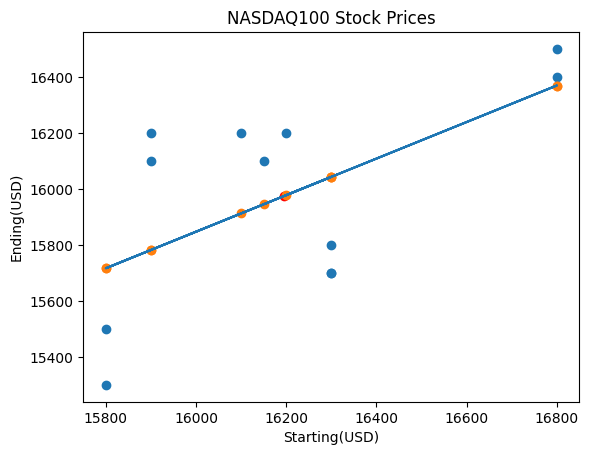

In [72]:
# plt.plot(x, Predicted_y)
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['Starting(USD)'], df['Ending(USD)'])
plt.scatter(df['Starting(USD)'], reg.predict(x))
plt.xlabel('Starting(USD)')
plt.ylabel('Ending(USD)')
plt.title('NASDAQ100 Stock Prices')

# R2 Squared Value/Accuracy for Regression

In [73]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571